<a href="https://colab.research.google.com/github/mabdelbarry/BikeShare/blob/main/Snag_List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
import os

In [2]:
import matplotlib.pyplot as plt


In [45]:
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/MyDrive/CR")

Mounted at /content/gdrive


# L3PH3 Snag List
## PTO comments
First let's start with showing a sample of the comments we received, the shown sample is the head for the first five column

In [46]:
#print(dir(pd))
snag_list = pd.read_csv("/content/gdrive/MyDrive/CR/PTO.csv", parse_dates = True, index_col = 'number')
snag_list.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 53 entries, 1.0 to nan
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Location     52 non-null     object
 1   section      52 non-null     object
 2   Sub-section  52 non-null     object
 3   Description  52 non-null     object
 4   Class        52 non-null     object
 5   Responsible  52 non-null     object
 6   Time frame   52 non-null     object
dtypes: object(7)
memory usage: 3.3+ KB


In [5]:
snag_list['Time frame'] = pd.to_datetime(snag_list['Time frame'])

In [6]:
snag_list.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 53 entries, 1.0 to nan
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Location     52 non-null     object        
 1   section      52 non-null     object        
 2   Sub-section  52 non-null     object        
 3   Description  52 non-null     object        
 4   Class        52 non-null     object        
 5   Responsible  52 non-null     object        
 6   Time frame   52 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 3.3+ KB


## Describing the data
The next table is describing the data :
-> The table showing the count of the comments
-> The table showing the top frequented for the project sections
-> The table showing the nearest and farest due date

In [7]:
snag_list.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Location,section,Sub-section,Description,Class,Responsible,Time frame
count,52,52,52,52,52,52,52
unique,10,6,17,48,4,3,19
top,LOT 52,LPS,CT,The adjustment (alignment) of 750v concrete gu...,C,CR,2023-02-01 00:00:00
freq,10,14,10,3,27,48,7
first,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-10 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01 00:00:00


#Plotting the Location
Let's show The comments for each LOT on the project

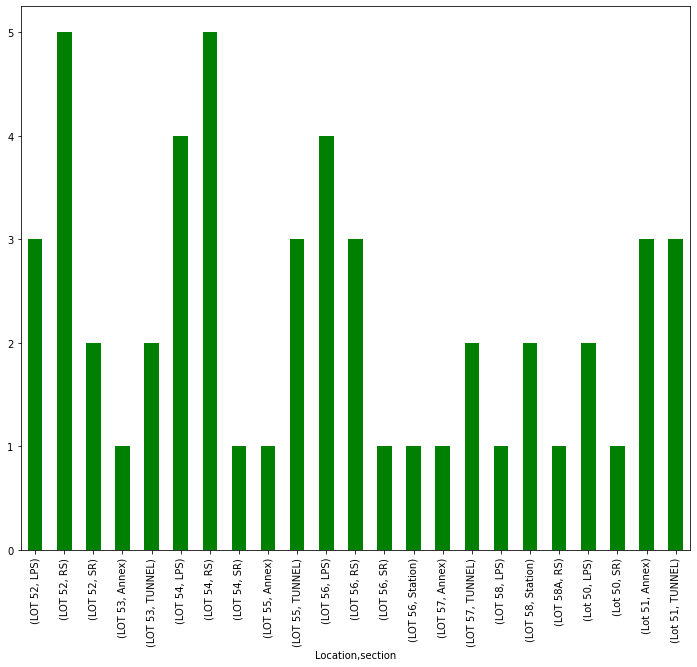

In [8]:
snag_list.groupby(['Location']).section.value_counts().sort_index().plot.bar(figsize = (12,10), color = 'green');

In [9]:
snag_list.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 53 entries, 1.0 to nan
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Location     52 non-null     object        
 1   section      52 non-null     object        
 2   Sub-section  52 non-null     object        
 3   Description  52 non-null     object        
 4   Class        52 non-null     object        
 5   Responsible  52 non-null     object        
 6   Time frame   52 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 3.3+ KB


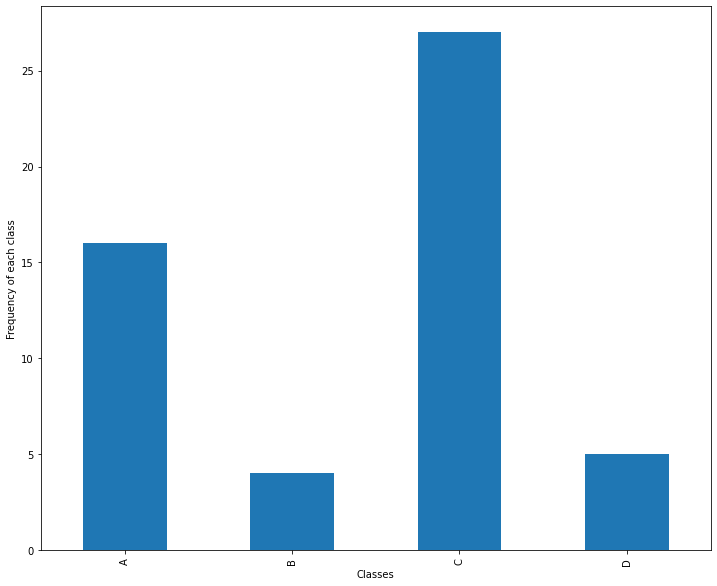

In [23]:
snag_list.Class.value_counts().sort_index().plot.bar(xlabel = 'Classes', ylabel = 'Frequency of each class', figsize = (12,10));

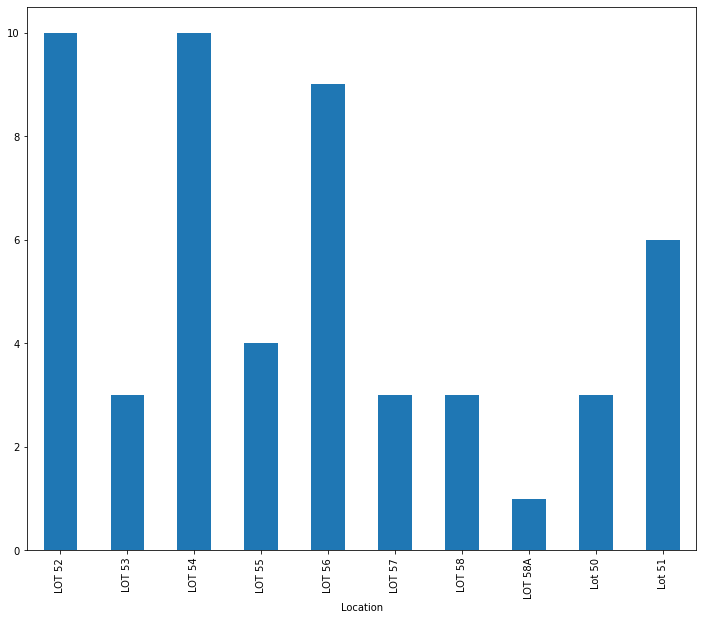

In [24]:
snag_list.groupby(['Location']).Description.count().plot.bar(figsize = (12,10));

## Describing the exact location
Here you can show for each section how many comments on the whole project:

In [12]:
snag_list.groupby(['section']).Description.count()

section
Annex       6
LPS        14
RS         14
SR          5
Station     3
TUNNEL     10
Name: Description, dtype: int64

## plotting the sections

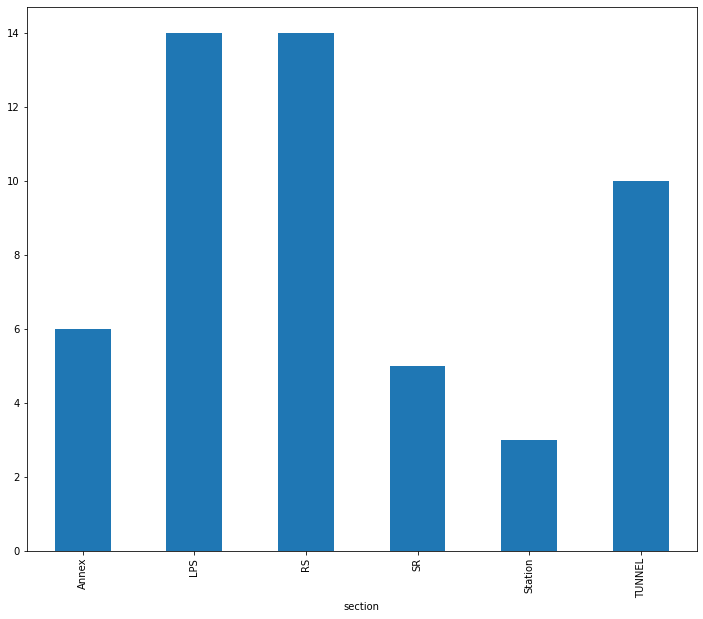

In [25]:
snag_list.groupby(['section']).Description.count().plot.bar(figsize = (12,10));

#Exploring the average of the comments:
Let's Assume that Class A is 4, Class B is 3, Class C is 2 and Class D is 1, as an example if the average falled between 2 and 3 so the average of the comments classification is between B and C.

In [14]:
snag_mapped = snag_list.copy()
snag_mapped.Class = snag_mapped.Class.map({'A': 4, 'B' : 3, 'C' : 2, 'D' : 1})
snag_mapped.head()

,Location,section,Sub-section,Description,Class,Responsible,Time frame
number,,,,,,,
1.0,Lot 50,LPS,LV cable,"Label for cables no. (001-G-001/1067, 001-G-00...",2.0,CR,2022-11-01
2.0,Lot 50,LPS,LV cable,Trip unit to be adjusted for all C.B.,3.0,CR,2022-12-01
3.0,Lot 50,SR,SR,Cracks of the 750 V concrete gutters and concr...,4.0,CR,2023-01-01
4.0,Lot 51,TUNNEL,CT,There was some damage in some of the cable tra...,4.0,CR,2023-02-04
5.0,Lot 51,TUNNEL,LV cable,LV cable systematic to be done.,4.0,CR,2022-12-11


Describe the classification mode

Average is approximately 2.6 which is between B and C and almost near to B class

In [15]:
snag_list.Class.mode()

0    C
dtype: object

Most frequent class is C

# Relation between location and the severity of comments

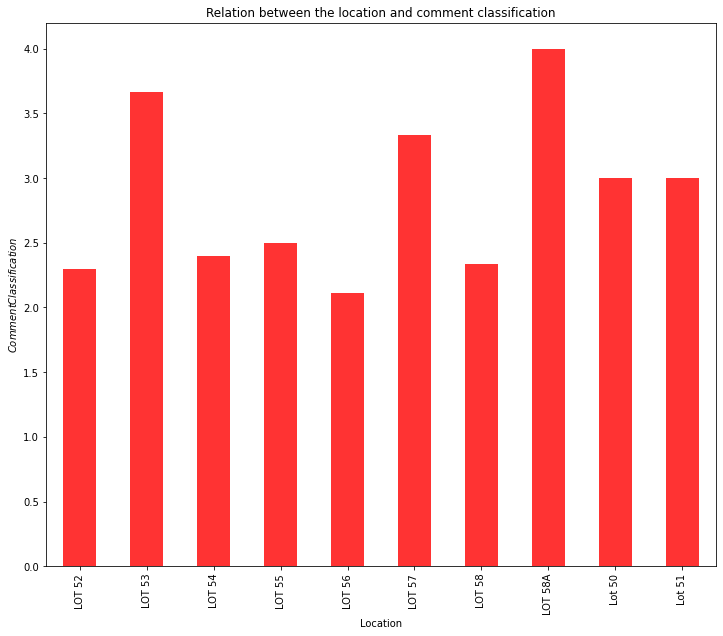

In [42]:
snag_mapped.groupby(['Location']).Class.mean().plot.bar(ylabel = '$Comment Classification$', title = 'Relation between the location and comment classification', figsize = (12,10), color = 'red', alpha = 0.8);

# Relation between the technical room and comments

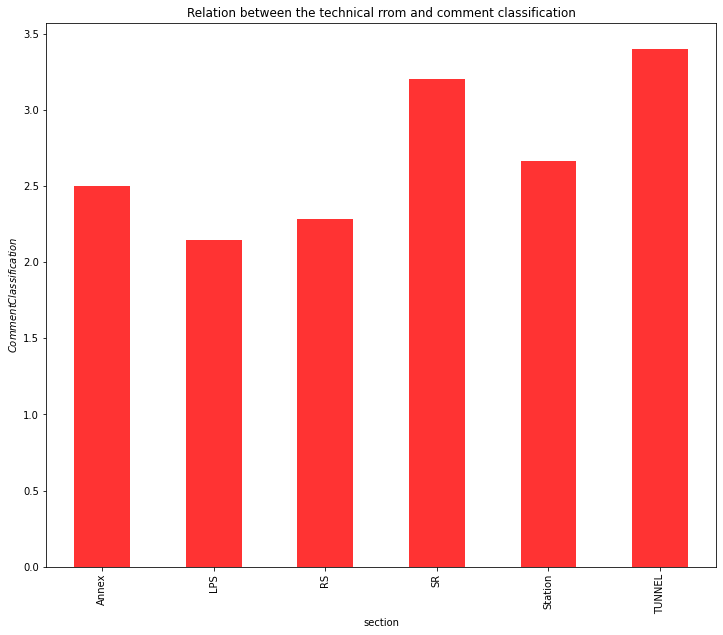

In [35]:
snag_mapped.groupby(['section']).Class.mean().plot.bar(ylabel = '$Comment Classification$', title = 'Relation between the technical rrom and comment classification', figsize = (12,10), color = 'red', alpha = 0.8);

# Relation between activity and comments

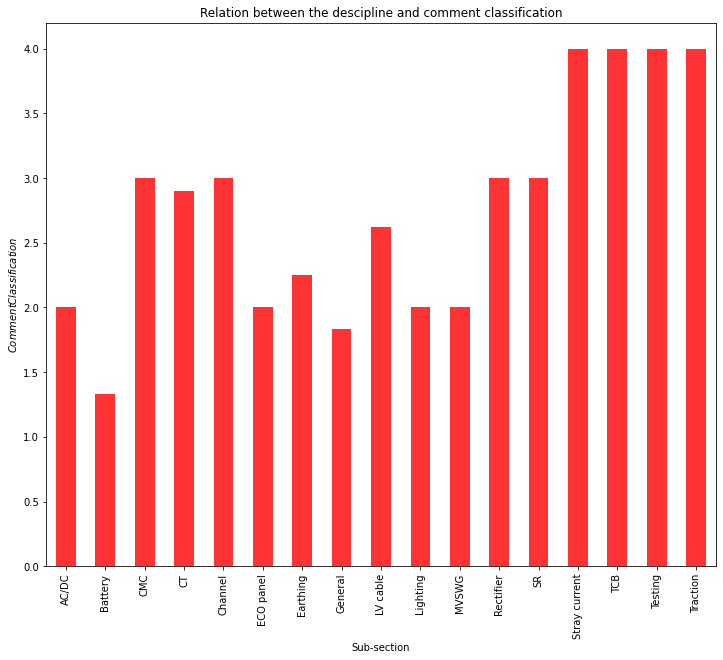

In [36]:
snag_mapped.groupby(['Sub-section']).Class.mean().plot.bar(ylabel = '$Comment Classification$', title = 'Relation between the descipline and comment classification', figsize = (12,10), color = 'red', alpha = 0.8);

#Insights:
1 - The activities related to (Traction, Testing, TCB and Stray current) are the most severe comments, it's clear that we shall do some improvement for the mentioned activities.

---


2-CMC, CT, concrete channel, Rectifier and SR are approximately arround B class comments which are over than the normal distribution for the comment, an improvement to be done for the mentioned activities as a second step.

---


3- Battery comments are almost for Alstom and that's why it's near for class D.

---


4-General comments should be neglected from the comparison.


# take a look for the time frame
Relation between number of comments and the due date:

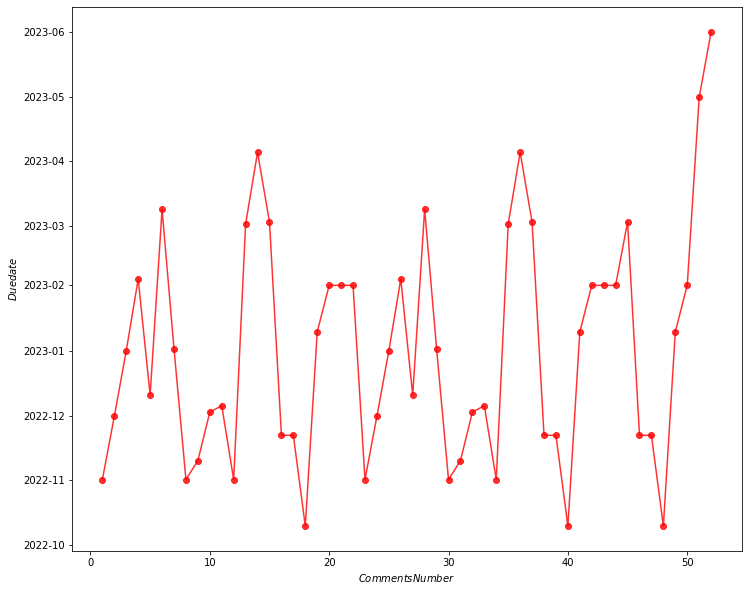

In [37]:
snag_list['Time frame'].plot(ylabel = "$Due date$", xlabel = '$Comments Number$', figsize = (12,10), marker = 'o', color = 'red', alpha = 0.8);

#Relation between the descipline and the the average for the due date
Average due date for each discipline:

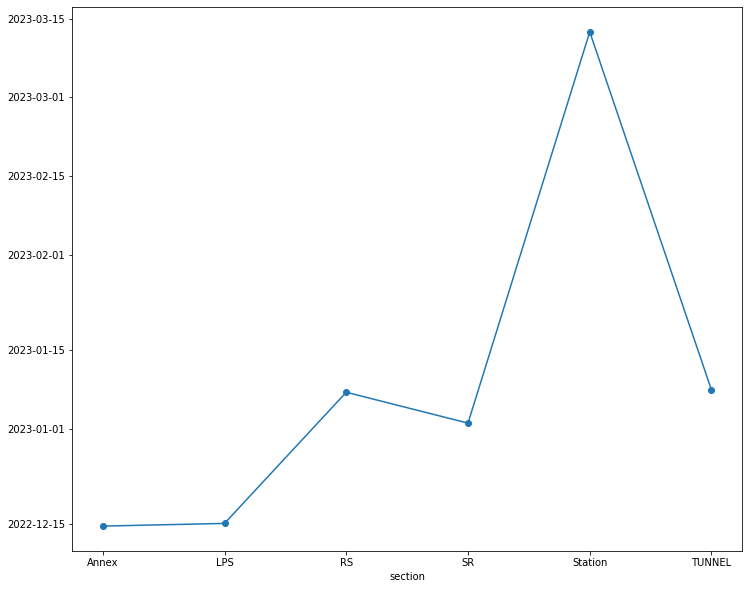

In [38]:
snag_list.groupby(['section'])['Time frame'].mean().plot(marker = 'o', figsize = (12,10));

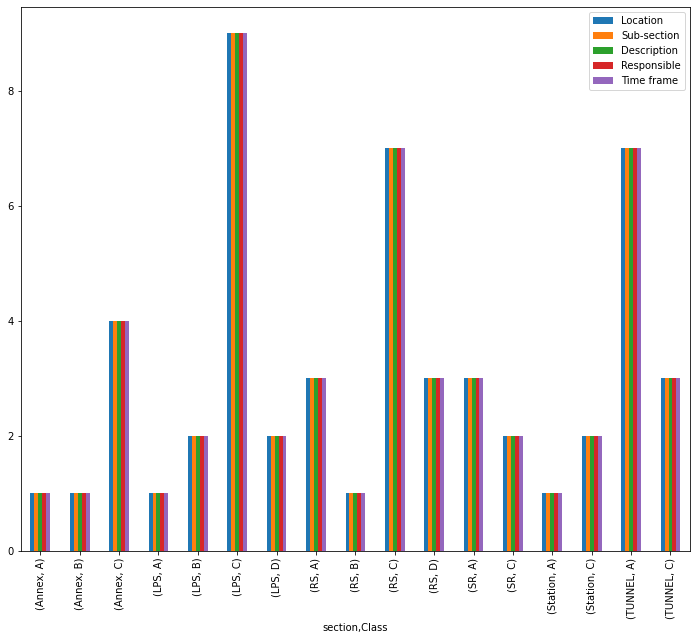

In [39]:
snag_list.groupby(['section', 'Class']).count().plot.bar(figsize = (12,10));